# Machine Learning 2023/2024

## Third Home Assignment

**Group Number:** 10

**Group Elements:**
- André Santos (fc53323)
- Filipe Santos (fc53304)
- João Martins (fc62532)
- Rúben Torres (fc62531)

**Hours Worked:**
- André Santos (10h)
- Filipe Santos (10h)
- João Martins (10h)
- Rúben Torres (10h)

### Imports

In [1]:
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from statsmodels.api import OLS, add_constant
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (PowerTransformer)
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

### Loading and understanding the Dataset

In [2]:
unpickled_df = pd.read_pickle("drd2_data.pickle")
#unpickled_df

In [3]:
print(type(unpickled_df[0]))
unpickled_df[0].shape

<class 'numpy.ndarray'>


(7337, 2132)

Data is splitted upon loading

In [4]:
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

In [5]:
#for col in (col_names):
#    print("coluna: ", col)

In [6]:
print(X_train.shape)
#X_train

(7337, 2132)


In [7]:
#X_train.tofile('X_train.csv', sep = ',')

In [8]:
print(X_ivs.shape)
#X_ivs

(816, 2132)


In [9]:
print(y_train.shape)
#y_train

(7337,)


In [10]:
#cols_to_discard = []
#for col in range (X_train.shape[1]):
#    print("coluna: ", col_names[col])
#    proportion = (X_train[: col] == 0).mean() * 100
#    if proportion > 0:
#            print(f"Proportion of missing values in column { col }: { round(proportion, 2) }%")
#        cols_to_discard.append(col)

In [11]:
N,M=X_train.shape
N,M
v=np.hstack((y_train.reshape((N,1)), X_train))
pd.DataFrame(v)

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,0.654947,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649995,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.154947,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.616176,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.359725,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0.000000,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,0.002193,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,0.293481,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,0.596804,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Data Treatement

In [12]:
#powerscaler not ideal for this dataset since it deletes outliers and we believe that the outliers shouldn't be removed from this dataset
#scaler = PowerTransformer().fit(X_train)

sScaler = StandardScaler()
X_train_scaled = sScaler.fit_transform(X_train)
X_ivs_scaled = sScaler.transform(X_ivs)

In [13]:
#print(np.unique(X_train_scaled[: 1]))

In [14]:
#X_train_scaled.tofile('X_train_scaled.csv', sep = ',')

<h3>selecting features by droping the features with correlation score bellow 0.05 to the dependant variable

In [16]:
#new correlation matrix with scaled data
v_scaled=np.hstack((y_train.reshape((N,1)), X_train_scaled))
pd.DataFrame(v_scaled)

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,0.654947,0.609921,0.608648,1.098414,-0.081854,0.246156,-0.058057,1.908209,0.737657,0.614996,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
1,0.649995,-0.023790,-0.024513,-0.103427,-0.081854,0.413306,-0.058057,-0.243126,-0.038629,0.032423,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
2,0.154947,-0.453381,-0.454433,-0.343795,-0.477479,-0.589590,-0.508809,-0.601682,-0.349144,-0.355960,...,1.234467,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
3,0.616176,5.645607,5.644129,5.184672,7.039406,2.753396,7.153978,4.059544,5.783518,5.702803,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,5.029661,3.091413,5.116060
4,0.359725,-0.238802,-0.237426,-0.343795,-0.477479,-0.422441,-0.508809,-0.243126,-0.271515,-0.355960,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0.000000,0.201712,0.200698,0.136941,-0.477479,-0.088142,-0.508809,0.115430,0.116628,-0.122930,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
7333,0.002193,-1.048209,-1.049199,-0.824531,-0.477479,-0.589590,-0.508809,-0.960238,-0.970173,-0.822018,...,-0.810066,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,3.091413,-0.195463
7334,0.293481,0.439425,0.438883,-0.343795,-0.477479,0.580455,-0.508809,-0.243126,0.504771,0.770349,...,-0.810066,-0.195463,-0.179087,3.210153,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463
7335,0.596804,-0.205564,-0.206229,-0.343795,0.313772,-0.255292,-0.058057,0.115430,-0.193886,-0.161769,...,1.234467,-0.195463,-0.179087,-0.311512,-0.168687,-0.105656,-0.136394,-0.198821,-0.323477,-0.195463


In [17]:
pd.DataFrame(np.corrcoef(v_scaled.T))

,0,1,2,3,4,5,6,7,8,9,...,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132
0,1.000000,0.160182,0.160216,0.130117,0.084939,0.151968,0.095929,0.126690,0.157545,0.165189,...,0.011360,0.095138,0.078900,-0.021728,-0.012977,0.001865,0.012468,0.031884,-0.027774,0.058370
1,0.160182,1.000000,0.999998,0.919389,0.772557,0.888252,0.784495,0.856242,0.992766,0.973177,...,0.213406,0.019559,0.127229,0.117371,-0.017119,0.053576,0.212881,0.342831,0.173077,0.219727
2,0.160216,0.999998,1.000000,0.919128,0.772379,0.888072,0.784320,0.855980,0.992623,0.972956,...,0.213435,0.019583,0.127309,0.117351,-0.017201,0.053498,0.212889,0.342785,0.173016,0.219646
3,0.130117,0.919389,0.919128,1.000000,0.838103,0.863232,0.843652,0.931528,0.922469,0.905146,...,0.196534,-0.008557,0.095891,0.064926,-0.026235,0.043314,0.181134,0.332638,0.137266,0.205303
4,0.084939,0.772557,0.772379,0.838103,1.000000,0.704868,0.993448,0.653117,0.774714,0.769215,...,0.185163,-0.032325,0.083849,0.022735,-0.013150,0.045537,0.110449,0.409722,0.210139,0.231743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,0.001865,0.053576,0.053498,0.043314,0.045537,0.036037,0.047958,0.038387,0.059813,0.061989,...,0.018420,-0.020652,-0.018922,-0.009945,-0.009870,1.000000,0.063520,0.047193,0.032638,0.027846
2129,0.012468,0.212881,0.212889,0.181134,0.110449,0.254921,0.115041,0.202605,0.213051,0.218212,...,0.022700,-0.015847,0.075295,-0.020981,-0.004391,0.063520,1.000000,0.026101,0.049729,0.000372
2130,0.031884,0.342831,0.342785,0.332638,0.409722,0.276091,0.410854,0.233237,0.342548,0.342609,...,0.006494,0.017914,0.009569,-0.004214,-0.020504,0.047193,0.026101,1.000000,0.123067,0.127682
2131,-0.027774,0.173077,0.173016,0.137266,0.210139,0.177572,0.216401,0.081396,0.184924,0.190152,...,0.004409,-0.026145,0.009127,0.051670,-0.029027,0.032638,0.049729,0.123067,1.000000,0.082630


In [18]:
corr_matrix = pd.DataFrame(np.corrcoef(v_scaled.T))

# Initialize an empty list to store line numbers and values
filtered_values_per_line = []

# Iterate through the DataFrame and store line numbers and values
#for i, row in enumerate(corr_matrix.values):
#    line_values = [(j, value) for j, value in enumerate(row) if abs(value) > 0. and abs(value) < 1]
#    if line_values:
#        filtered_values_per_line.append(line_values)

# Display the filtered values for each line
#for line_number, values in enumerate(filtered_values_per_line):
#    print(f"Line {line_number}: {values}")
   
for row, value in enumerate(corr_matrix.values[0, 1:]):
    if value > 0.05:
        line_values = (row, value)
        filtered_values_per_line.append(line_values)

#for values, line_number in enumerate(filtered_values_per_line):
    #print(f"Line {line_number}: {values}")

len(filtered_values_per_line)

374

In [19]:
# Initialize an empty list to store line numbers and values
filtered_values_per_line = []

for row, value in enumerate(corr_matrix.values[0, 1:]):
    if value < 0.05: #0.05 to have a total of 374 features
        line_values = (row, value)
        filtered_values_per_line.append(line_values)

features_to_remove = []
for values, line_number in enumerate(filtered_values_per_line):
    #print(f"Feature {line_number}: {values}")
    features_to_remove.append(line_number[0])

len(filtered_values_per_line)
#print (features_to_remove)

1758

<h4>New X-train with removed features

In [20]:
X_train_cut= np.delete(X_train_scaled, features_to_remove, 1)

N_cut,M_cut=X_train_cut.shape
X_train_cut.shape

(7337, 374)

In [21]:
X_ivs_cut= np.delete(X_ivs_scaled, features_to_remove, 1)

X_ivs_cut.shape

(816, 374)

In [22]:
#print(np.unique(X_train[: 1]))

<h3>Feature Selection

<h4>Stepwise fowards feature selection 

In [27]:
#This approach of feature selection takes to long on big datasets (7000+, 300+)

#N,M=X_train_cut.shape

#using linear regression for sequential feature selection
#lmr=LinearRegression()
#sfs = SequentialFeatureSelector(lmr, n_features_to_select=50, n_jobs=16)
#sfs.fit(X_train_cut, y_train)

#get the relevant columns
#features=sfs.get_support()
#Features_selected =np.arange(M)[features]
#print("The features selected are columns: ", Features_selected)

#X_train_cut_sfs=sfs.transform(X_train_cut)
#X_test_cut_sfs=sfs.transform(X_ivs_cut)

<h4>RFs for feature selection

In [28]:
def rffeatureSelect(x_train, x_ivs, n_features, t):
    rfr=RandomForestRegressor(random_state=0, n_jobs=6) #n_jobs=8
    rfr.fit(x_train, y_train)
    #for i, imp in enumerate(rfr.feature_importances_):
    #    print("Feature", i, "Importance:", imp )
    
    sel = SelectFromModel(estimator=rfr, threshold= t) #Change the threshold! See what happens!
    sel.fit(x_train, y_train)
    
    #print("Importances: ", sel.estimator.feature_importances_)
    
    #print("Default threshold: ", sel.threshold_)
    
    features=sel.get_support()
    Features_selected =np.arange(n_features)[features]
    print("The features selected are columns: ", Features_selected,".\n Number of features:", len(Features_selected))
    
    X_train_rffs=sel.transform(x_train)
    X_test_rffs=sel.transform(x_ivs)
    return X_train_rffs, X_test_rffs
#naif_model_testingR(nX_train_cut, nX_test_cut, y_train, y_ivs) # y_ivs doesn't exist.

In [40]:
#takes around 5 min to execute
X_train_rffs, X_test_rffs = rffeatureSelect(X_train, X_ivs, M, .001)#.003

The features selected are columns:  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   19   22   23   24   25   26   27   28   29   30
   31   32   33   34   35   36   37   38   39   40   41   42   96  154
  186  216  246  287  303  316  336  348  353  362  364  386  440  442
  444  472  494  502  536  546  551  561  675  679  695  769  778  790
  815  819  839  853  871  879  886  889  891  909  924  939  956  959
  981  982 1013 1020 1029 1037 1041 1054 1063 1087 1088 1139 1147 1161
 1167 1176 1214 1248 1283 1284 1285 1333 1377 1397 1440 1454 1499 1527
 1540 1575 1598 1604 1641 1665 1667 1687 1709 1722 1752 1778 1811 1841
 1857 1868 1893 1916 1921 1922 1931 1934 1968 1992 1998 2004 2017 2069
 2076 2080 2122] .
 Number of features: 143


In [41]:
#takes around 5 min to execute
X_train_scaled_rffs, X_test_scaled_rffs = rffeatureSelect(X_train_scaled, X_ivs_scaled, M, .001)#.003

The features selected are columns:  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   19   22   23   24   25   26   27   28   29   30
   31   32   33   34   35   36   37   38   39   40   41   42   96  154
  186  216  246  287  303  316  336  348  353  362  364  377  386  440
  442  444  472  494  502  546  551  561  675  679  695  769  778  790
  815  819  839  853  871  879  886  889  891  909  924  939  956  959
  981  982 1013 1020 1029 1037 1041 1054 1063 1087 1088 1139 1147 1161
 1167 1176 1214 1248 1283 1284 1285 1333 1397 1440 1454 1499 1527 1540
 1575 1598 1604 1641 1649 1652 1665 1667 1686 1687 1709 1752 1778 1811
 1841 1857 1868 1893 1916 1921 1922 1931 1934 1968 1992 1998 2004 2017
 2069 2076 2122] .
 Number of features: 143


In [42]:
X_train_cut_rffs, X_test_cut_rffs= rffeatureSelect(X_train_cut, X_ivs_cut, M_cut, .005)#.01

The features selected are columns:  [  0   1   3   4   5   6   8   9  11  16  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  50  68  74  78  79  90  92 102
 140 161 167 178 187 192 201 240 267 272 298 299 306 327 343] .
 Number of features: 51


<h4>Principal component analisys (PCA)

In [43]:
def pca(x_train, n_comps):
    pca = PCA(n_components=n_comps)
    pca.fit(x_train)
    tve=0
    for i, ve in enumerate(pca.explained_variance_ratio_):
        tve+=ve
        print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
    #print()
    #print("Actual Eigenvalues:", pca.singular_values_)
    #for i,comp in enumerate(pca.components_):
    #    print("PC",i, "-->", comp)    
    return pca

def kpca(x_train, n_comps):
    kpca = KernelPCA(n_components=n_comps, kernel='rbf')#, gamma=3)
    kpca.fit(x_train)
    X_train_kpca = kpca.transform(x_train)
    return X_train_kpca

In [ ]:
pca1 = pca(X_train, 100) 
X_train_pca = pca1.transform(X_train)
#X_test_pca=pca.transform(X_ivs)

In [75]:
X_train_kpca =kpca(X_train, 100)

In [100]:
pca_scaled = pca(X_train_scaled, 150) 
X_train_scaled_pca = pca_scaled.transform(X_train_scaled)
#X_test_scaled_pca=pca_scaled.transform(X_ivs_scaled)

PC0 - Variance explained:  0.0259 - Total Variance:  0.0259
PC1 - Variance explained:  0.0131 - Total Variance:  0.0389
PC2 - Variance explained:  0.0126 - Total Variance:  0.0515
PC3 - Variance explained:  0.0116 - Total Variance:  0.0631
PC4 - Variance explained:  0.0099 - Total Variance:  0.0730
PC5 - Variance explained:  0.0077 - Total Variance:  0.0807
PC6 - Variance explained:  0.0074 - Total Variance:  0.0881
PC7 - Variance explained:  0.0068 - Total Variance:  0.0949
PC8 - Variance explained:  0.0066 - Total Variance:  0.1016
PC9 - Variance explained:  0.0064 - Total Variance:  0.1079
PC10 - Variance explained:  0.0062 - Total Variance:  0.1141
PC11 - Variance explained:  0.0059 - Total Variance:  0.1200
PC12 - Variance explained:  0.0057 - Total Variance:  0.1258
PC13 - Variance explained:  0.0054 - Total Variance:  0.1312
PC14 - Variance explained:  0.0052 - Total Variance:  0.1364
PC15 - Variance explained:  0.0051 - Total Variance:  0.1415
PC16 - Variance explained:  0.0051

In [77]:
X_train_scaled_kpca =kpca(X_train_scaled, 100)

In [78]:
pca_cut = pca(X_train_cut, 100)
X_train_cut_pca = pca_cut.transform(X_train_cut)
#X_test_cut_pca=pca_cut.transform(X_ivs_cut)

PC0 - Variance explained:  0.0862 - Total Variance:  0.0862
PC1 - Variance explained:  0.0406 - Total Variance:  0.1268
PC2 - Variance explained:  0.0323 - Total Variance:  0.1591
PC3 - Variance explained:  0.0293 - Total Variance:  0.1884
PC4 - Variance explained:  0.0272 - Total Variance:  0.2156
PC5 - Variance explained:  0.0256 - Total Variance:  0.2412
PC6 - Variance explained:  0.0245 - Total Variance:  0.2657
PC7 - Variance explained:  0.0191 - Total Variance:  0.2848
PC8 - Variance explained:  0.0169 - Total Variance:  0.3017
PC9 - Variance explained:  0.0163 - Total Variance:  0.3180
PC10 - Variance explained:  0.0137 - Total Variance:  0.3317
PC11 - Variance explained:  0.0133 - Total Variance:  0.3450
PC12 - Variance explained:  0.0124 - Total Variance:  0.3573
PC13 - Variance explained:  0.0112 - Total Variance:  0.3685
PC14 - Variance explained:  0.0109 - Total Variance:  0.3794
PC15 - Variance explained:  0.0107 - Total Variance:  0.3901
PC16 - Variance explained:  0.0099

In [79]:
X_train_cut_kpca = kpca(X_train_cut, 100)

In [ ]:
pca_rffs = pca(X_train_rffs, 70)
X_train_rffs_pca = pca_rffs.transform(X_train_rffs)
#X_test_rffs_pca=pca_rffs.transform(X_test_rffs)

In [81]:
X_train_rffs_kpca =kpca(X_train_rffs, 70)

In [82]:
#pca_scaled_rffs
pca_scaled_rffs = pca(X_train_scaled_rffs, 70)
X_train_scaled_rffs_pca = pca_scaled_rffs.transform(X_train_scaled_rffs)
#X_test_scaled_rffs_pca = pca_scaled_rffs.transform(X_test_scaled_rffs)

PC0 - Variance explained:  0.1980 - Total Variance:  0.1980
PC1 - Variance explained:  0.0486 - Total Variance:  0.2466
PC2 - Variance explained:  0.0421 - Total Variance:  0.2886
PC3 - Variance explained:  0.0387 - Total Variance:  0.3273
PC4 - Variance explained:  0.0298 - Total Variance:  0.3571
PC5 - Variance explained:  0.0253 - Total Variance:  0.3824
PC6 - Variance explained:  0.0217 - Total Variance:  0.4042
PC7 - Variance explained:  0.0211 - Total Variance:  0.4252
PC8 - Variance explained:  0.0205 - Total Variance:  0.4457
PC9 - Variance explained:  0.0192 - Total Variance:  0.4649
PC10 - Variance explained:  0.0178 - Total Variance:  0.4828
PC11 - Variance explained:  0.0164 - Total Variance:  0.4991
PC12 - Variance explained:  0.0152 - Total Variance:  0.5144
PC13 - Variance explained:  0.0142 - Total Variance:  0.5286
PC14 - Variance explained:  0.0132 - Total Variance:  0.5417
PC15 - Variance explained:  0.0128 - Total Variance:  0.5546
PC16 - Variance explained:  0.0118

In [83]:
X_train_scaled_rffs_kpca = kpca(X_train_scaled_rffs, 70)

In [84]:
pca_cut_rffs = pca(X_train_cut_rffs, 25)
X_train_cut_rffs_pca=pca_cut_rffs.transform(X_train_cut_rffs)
#X_test_cut_rffs_pca=pca_cut.transform(X_test_cut_rffs)

PC0 - Variance explained:  0.4475 - Total Variance:  0.4475
PC1 - Variance explained:  0.0565 - Total Variance:  0.5040
PC2 - Variance explained:  0.0497 - Total Variance:  0.5537
PC3 - Variance explained:  0.0418 - Total Variance:  0.5955
PC4 - Variance explained:  0.0317 - Total Variance:  0.6272
PC5 - Variance explained:  0.0297 - Total Variance:  0.6568
PC6 - Variance explained:  0.0259 - Total Variance:  0.6827
PC7 - Variance explained:  0.0241 - Total Variance:  0.7068
PC8 - Variance explained:  0.0210 - Total Variance:  0.7278
PC9 - Variance explained:  0.0203 - Total Variance:  0.7481
PC10 - Variance explained:  0.0201 - Total Variance:  0.7682
PC11 - Variance explained:  0.0197 - Total Variance:  0.7879
PC12 - Variance explained:  0.0188 - Total Variance:  0.8067
PC13 - Variance explained:  0.0187 - Total Variance:  0.8253
PC14 - Variance explained:  0.0180 - Total Variance:  0.8433
PC15 - Variance explained:  0.0168 - Total Variance:  0.8601
PC16 - Variance explained:  0.0158

In [85]:
X_train_cut_rffs_kpca = kpca(X_train_cut_rffs, 25)

<h3>Cross-validation. Evaluation of the (models) and data configurations.

In [86]:
def printAvalStat(truth, preds):
    avalStats = []
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval=pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)"%(corr,pval))

    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is:", mean_absolute_error(truth, preds),"\n")
    avalStats.append(explained_variance_score(truth, preds))
    avalStats.append(mean_squared_error(truth, preds, squared=False))
    avalStats.append(pearsonr(truth, preds))
    #avalStats.append( %(corr,pval) )
    return avalStats

    

<h4>N-Fold Cross validation

In [87]:
def nfold_valid(X_train_Valids):
    kf = KFold(n_splits=5, shuffle=True, random_state=23)
    kf.get_n_splits(X_train_Valids)
    TRUTH_nfold=None
    PREDS_nfold=None
    for train_index, test_index in kf.split(X_train_Valids):
        X_train_nfold, X_ivs_nfold = X_train_Valids[train_index], X_train_Valids[test_index]
        y_train_nfold, y_ivs_nfold = y_train[train_index], y_train[test_index]

        #mdl = DecisionTreeRegressor()#max_depth = 5)
        mdl = RandomForestRegressor(n_estimators=10, random_state=0, min_samples_leaf=3, max_depth = 10, n_jobs=6)
        mdl.fit(X_train_nfold, y_train_nfold)
        preds = mdl.predict(X_ivs_nfold)
        if TRUTH_nfold is None:
            PREDS_nfold=preds
            TRUTH_nfold=y_ivs_nfold
        else:
            PREDS_nfold=np.hstack((PREDS_nfold, preds))
            TRUTH_nfold=np.hstack((TRUTH_nfold, y_ivs_nfold))
        
    printAvalStat(TRUTH_nfold, PREDS_nfold)

#print("N-fold cross validation of nXf_train, after sequencial reduction feature selection")
#nfold_valid(nXf_train)





In [88]:
#first unchanged data evaluations
print("N-fold cross validation of X_train")
nfold_valid(X_train)
print("N-fold cross validation of X_train_scaled")
nfold_valid(X_train_scaled)

#manually cut features data evaluations
print("N-fold cross validation of X_train_cut(already scaled!)")
nfold_valid(X_train_cut)

#feature selected data evaluations
print("N-fold cross validation of X_train_rffs")
nfold_valid(X_train_rffs)
print("N-fold cross validation of X_train_scaled_rffs")
nfold_valid(X_train_scaled_rffs)

#cut x feature selected data evaluation
print("N-fold cross validation of X_train_cut_rffs(already scaled!)")
nfold_valid(X_train_cut_rffs)

N-fold cross validation of X_train
The RVE is:  0.4306622630357596
The rmse is:  0.2087354179051696
The Correlation Score is: 0.6606 (p-value=0.000000e+00)
The Maximum Error is:  0.8645408990344696
The Mean Absolute Error is: 0.165311491822563 

N-fold cross validation of X_train_scaled
The RVE is:  0.43079787092361854
The rmse is:  0.20871057962911607
The Correlation Score is: 0.6607 (p-value=0.000000e+00)
The Maximum Error is:  0.8645408990344698
The Mean Absolute Error is: 0.16528339261716604 

N-fold cross validation of X_train_cut(already scaled!)
The RVE is:  0.4262619972524192
The rmse is:  0.20955020213931275
The Correlation Score is: 0.6565 (p-value=0.000000e+00)
The Maximum Error is:  0.8327437900923893
The Mean Absolute Error is: 0.16607190021223064 

N-fold cross validation of X_train_rffs
The RVE is:  0.43427492253919797
The rmse is:  0.20807215006462745
The Correlation Score is: 0.6632 (p-value=0.000000e+00)
The Maximum Error is:  0.8638021741678932
The Mean Absolute Erro

In [101]:
#Pca evaluations
print("N-fold cross validation of X_train_pca")
nfold_valid(X_train_pca)
print("N-fold cross validation of X_train_scaled_pca")
nfold_valid(X_train_scaled_pca)

print("N-fold cross validation of X_train_cut_pca(already scaled!)")
nfold_valid(X_train_cut_pca)

print("N-fold cross validation of X_train_rffs_pca")
nfold_valid(X_train_rffs_pca)
print("N-fold cross validation of X_train_scaled_rffs_pca")
nfold_valid(X_train_scaled_rffs_pca)

print("N-fold cross validation of X_train_cut_rffs_pca(already scaled!)")
nfold_valid(X_train_cut_rffs_pca)

N-fold cross validation of X_train_pca
The RVE is:  0.40243392524173227
The rmse is:  0.21384983525808984
The Correlation Score is: 0.6452 (p-value=0.000000e+00)
The Maximum Error is:  0.8305012606991558
The Mean Absolute Error is: 0.16896091646769132 

N-fold cross validation of X_train_scaled_pca
The RVE is:  0.4255149728155324
The rmse is:  0.20968213972802616
The Correlation Score is: 0.6580 (p-value=0.000000e+00)
The Maximum Error is:  0.7897435841724622
The Mean Absolute Error is: 0.1659543645522143 

N-fold cross validation of X_train_cut_pca(already scaled!)
The RVE is:  0.42626166497173934
The rmse is:  0.20956660157745494
The Correlation Score is: 0.6584 (p-value=0.000000e+00)
The Maximum Error is:  0.767632344439466
The Mean Absolute Error is: 0.1665529998847385 

N-fold cross validation of X_train_rffs_pca
The RVE is:  0.38835837104581816
The rmse is:  0.21635179699757218
The Correlation Score is: 0.6346 (p-value=0.000000e+00)
The Maximum Error is:  0.8187096958541058
The M

In [90]:
#Kpca evaluations
print("N-fold cross validation of X_train_kpca")
nfold_valid(X_train_kpca)
print("N-fold cross validation of X_train_scaled_kpca")
nfold_valid(X_train_scaled_kpca)

print("N-fold cross validation of X_train_cut_kpca(already scaled!)")
nfold_valid(X_train_cut_kpca)

print("N-fold cross validation of X_train_rffs_kpca")
nfold_valid(X_train_rffs_kpca)
print("N-fold cross validation of X_train_scaled_rffs_kpca")
nfold_valid(X_train_scaled_rffs_kpca)

print("N-fold cross validation of X_train_cut_rffs_kpca(already scaled!)")
nfold_valid(X_train_cut_rffs_kpca)

N-fold cross validation of X_train_kpca
The RVE is:  0.20766765108781393
The rmse is:  0.24624797080869948
The Correlation Score is: 0.4561 (p-value=0.000000e+00)
The Maximum Error is:  0.8488884855533345
The Mean Absolute Error is: 0.19842078800306723 

N-fold cross validation of X_train_scaled_kpca
The RVE is:  0.4264363712451361
The rmse is:  0.20951208647911054
The Correlation Score is: 0.6596 (p-value=0.000000e+00)
The Maximum Error is:  0.7810330062802083
The Mean Absolute Error is: 0.16492001818943736 

N-fold cross validation of X_train_cut_kpca(already scaled!)
The RVE is:  0.47009611765177906
The rmse is:  0.20139019003514333
The Correlation Score is: 0.6865 (p-value=0.000000e+00)
The Maximum Error is:  0.7975236460222147
The Mean Absolute Error is: 0.15847636729303838 

N-fold cross validation of X_train_rffs_kpca
The RVE is:  0.1320321961525056
The rmse is:  0.2577308860063787
The Correlation Score is: 0.3635 (p-value=4.967061e-228)
The Maximum Error is:  0.8473072336692589

<h5>
Com estes resultados concluímos que o data tretment que efetuámos não afeta consideravelmente a qualidade dos modelos resultantes.
<br>
De salientar que os modelos resultantes dos dados manualmente cortados, que resultou numa redução de features de 2000+ para 377, tem resultados muito semelhantes aos modelos que usam todas as 2000+ features.
<br>
Por isso achamos que só o uso de mais e diferentes modelos para além de random forest é que poderemos melhorar o resultado das previsões.
</h5>

#### Daqui para a frente escolhemos o dataset X_train_scaled_pca por ter bom ratio de scores/ nº features usadas e ser mais simples envolvendo menos processamento do dataset original

<h3>New Models</h3>

In [91]:
def nfold_evaluate(mdl ,X_train_Valids):
    kf = KFold(n_splits=5, shuffle=True, random_state=23)
    kf.get_n_splits(X_train_Valids)
    TRUTH_nfold=None
    PREDS_nfold=None
    for train_index, test_index in kf.split(X_train_Valids):
        X_train_nfold, X_ivs_nfold = X_train_Valids[train_index], X_train_Valids[test_index]
        y_train_nfold, y_ivs_nfold = y_train[train_index], y_train[test_index]

        #mdl = DecisionTreeRegressor()#max_depth = 5)
        mdl.fit(X_train_nfold, y_train_nfold)
        preds = mdl.predict(X_ivs_nfold)
        if TRUTH_nfold is None:
            PREDS_nfold=preds
            TRUTH_nfold=y_ivs_nfold
        else:
            PREDS_nfold=np.hstack((PREDS_nfold, preds))
            TRUTH_nfold=np.hstack((TRUTH_nfold, y_ivs_nfold))
        
    return printAvalStat(TRUTH_nfold, PREDS_nfold)

In [92]:
RFR_mdl = RandomForestRegressor(n_estimators=10, random_state=0, min_samples_leaf=3, max_depth = 8, n_jobs=6)
LR_mdl = LinearRegression()
Ridge_mdl = Ridge(alpha=1, max_iter=9999999)#10
Lasso_mdl = Lasso(alpha=1, max_iter=9999999)#10
KNN_mdl =KNeighborsRegressor()
SVR_mdl =SVR()
XGB_mdl = XGBRegressor()
ABR_mdl = AdaBoostRegressor(n_estimators=10) #n_estimators=10
GBR_mdl = GradientBoostingRegressor(n_estimators=10, learning_rate=1.0, random_state=0) #n_estimators=10

In [93]:
#Set de controlo
print("Set de controlo")
print("result of linear regression model on the X_train_scaled dataset")
LR_ce = nfold_evaluate(LR_mdl ,X_train_scaled)
print("result of Ridge model on the X_train_scaled dataset")
Ridge_ce= nfold_evaluate(Ridge_mdl ,X_train_scaled)
print("result of Lasso regression model on the X_train_scaled dataset")
Lasso_ce=nfold_evaluate(Lasso_mdl ,X_train_scaled)
print("result of K-means regression model on the X_train_scaled dataset")
KNN_ce=nfold_evaluate(KNN_mdl ,X_train_scaled)
print("result of support vector regressor model on the X_train_scaled dataset")
SVR_ce=nfold_evaluate(SVR_mdl ,X_train_scaled)
print("result of XGBoost regression model on the X_train_scaled dataset")
XGB_ce=nfold_evaluate(XGB_mdl ,X_train_scaled)
print("result of AdaBoost regression model on the X_train_scaled dataset")
ABR_ce=nfold_evaluate(ABR_mdl ,X_train_scaled)
print("result of GradientBoost regression model on the X_train_scaled dataset")
GBR_ce=nfold_evaluate(GBR_mdl ,X_train_scaled)

Set de controlo
result of linear regression model on the X_train_scaled dataset
The RVE is:  0.43036631730088293
The rmse is:  0.20880393821899282
The Correlation Score is: 0.7026 (p-value=0.000000e+00)
The Maximum Error is:  0.9797748650935948
The Mean Absolute Error is: 0.15853068724620642 

result of Ridge model on the X_train_scaled dataset
The RVE is:  0.43384489082402156
The rmse is:  0.20816564760571085
The Correlation Score is: 0.7033 (p-value=0.000000e+00)
The Maximum Error is:  0.9999158704211308
The Mean Absolute Error is: 0.15771812938893398 

result of Lasso regression model on the X_train_scaled dataset
The RVE is:  -0.0001864913956102221
The rmse is:  0.2766632727709075
The Correlation Score is: -0.0182 (p-value=1.189339e-01)
The Maximum Error is:  0.613232559385074
The Mean Absolute Error is: 0.22794516065455514 

result of K-means regression model on the X_train_scaled dataset
The RVE is:  0.5199069084981629
The rmse is:  0.19505966472165026
The Correlation Score is: 0

In [102]:
#Set para testing do X_train_scaled_rffs_pca
print("result of linear regression model on the X_train_scaled_pca dataset")
LR_me = nfold_evaluate(LR_mdl ,X_train_scaled_pca)
print("result of Ridge model on the X_train_scaled_pca dataset")
Ridge_me = nfold_evaluate(Ridge_mdl ,X_train_scaled_pca)
print("result of Lasso regression model on the X_train_scaled_pca dataset")
Lasso_me =nfold_evaluate(Lasso_mdl ,X_train_scaled_pca)
print("result of K-means regression model on the X_train_scaled_pca dataset")
KNN_me =nfold_evaluate(KNN_mdl ,X_train_scaled_pca)
print("result of support vector regressor model on the X_train_scaled_pca dataset")
SVR_me =nfold_evaluate(SVR_mdl ,X_train_scaled_pca)
print("result of XGBoost regression model on the X_train_scaled_pca dataset")
XGB_me =nfold_evaluate(XGB_mdl ,X_train_scaled_pca)
print("result of AdaBoost regression model on the X_train_scaled_pca dataset")
ABR_me =nfold_evaluate(ABR_mdl ,X_train_scaled_pca)
print("result of GradientBoost regression model on the X_train_scaled_pca dataset")
GBR_me =nfold_evaluate(GBR_mdl ,X_train_scaled_pca)

result of linear regression model on the X_train_scaled_pca dataset
The RVE is:  0.4426068220827363
The rmse is:  0.2065341378581706
The Correlation Score is: 0.6656 (p-value=0.000000e+00)
The Maximum Error is:  0.8298692557546726
The Mean Absolute Error is: 0.1619193956563455 

result of Ridge model on the X_train_scaled_pca dataset
The RVE is:  0.442607790452041
The rmse is:  0.20653395845085465
The Correlation Score is: 0.6656 (p-value=0.000000e+00)
The Maximum Error is:  0.8298651762089456
The Mean Absolute Error is: 0.16191941596420703 

result of Lasso regression model on the X_train_scaled_pca dataset
The RVE is:  -0.0001864913956102221
The rmse is:  0.2766632727709075
The Correlation Score is: -0.0182 (p-value=1.189339e-01)
The Maximum Error is:  0.613232559385074
The Mean Absolute Error is: 0.22794516065455514 

result of K-means regression model on the X_train_scaled_pca dataset
The RVE is:  0.6019847011031803
The rmse is:  0.17452784489554513
The Correlation Score is: 0.7786

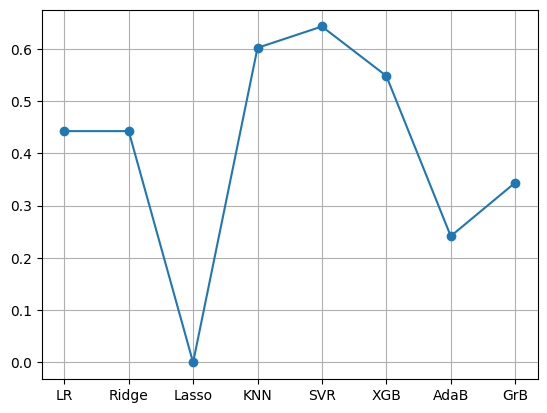

<Figure size 640x480 with 0 Axes>

In [105]:
imputers = ["LR", "Ridge","Lasso", "KNN", "SVR", "XGB", "AdaB", "GrB"]
RVEs = [LR_me[0], Ridge_me[0], Lasso_me[0], KNN_me[0], SVR_me[0], XGB_me[0], ABR_me[0], GBR_me[0]]

plt.plot(imputers, RVEs, marker = "o")
plt.grid()
plt.show()